In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [242]:
df = pd.read_csv("heart-disease.csv")
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [243]:
df["target"].value_counts()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Axes(0.125,0.11;0.775x0.77)


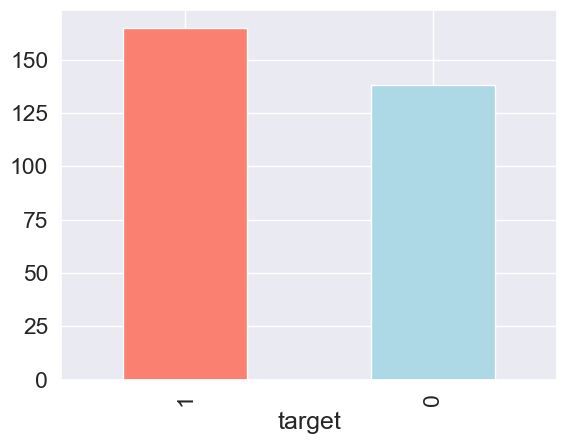

In [244]:
print(df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]))

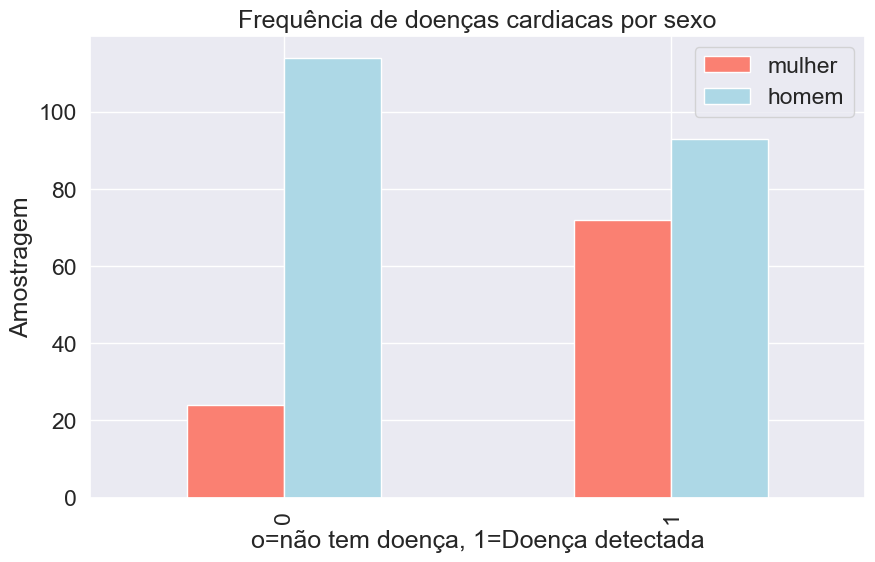

In [245]:
pd.crosstab(df["target"], df["sex"]).plot(kind="bar", figsize=(10,6), color = ["Salmon", "lightblue"])

plt.title("Frequência de doenças cardiacas por sexo")
plt.xlabel("o=não tem doença, 1=Doença detectada")
plt.ylabel("Amostragem")
plt.legend(["mulher","homem"])

Text(0, 0.5, 'frquência cardiaca máxima')

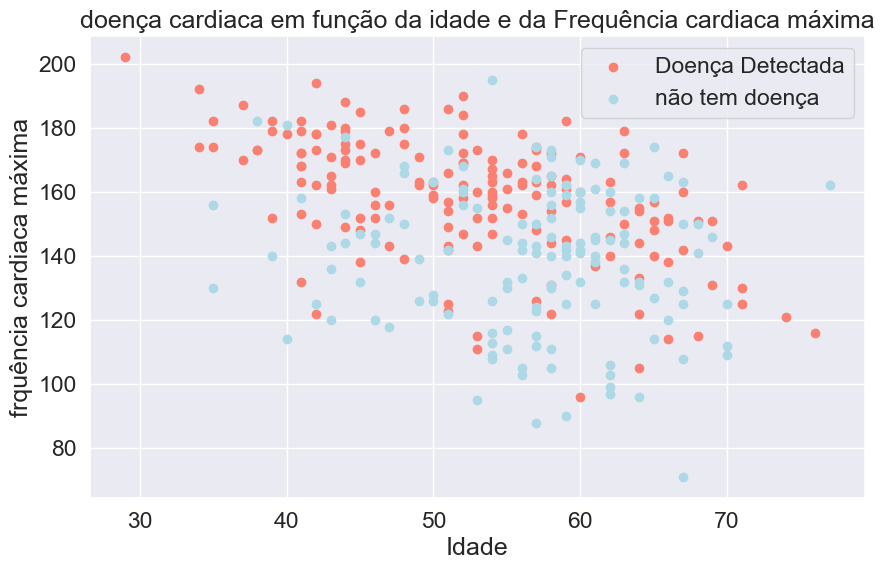

In [246]:
plt.figure(figsize=(10,6))

#valores positivos
plt.scatter(df["age"][df["target"] == 1], df["thalach"][df["target"]==1], c="salmon")

#valores negativos
plt.scatter(df["age"][df["target"] == 0], df["thalach"][df["target"] == 0], c="lightblue")

plt.title("doença cardiaca em função da idade e da Frequência cardiaca máxima")
plt.xlabel("Idade")
plt.legend(["Doença Detectada", "não tem doença"])
plt.ylabel("frquência cardiaca máxima")


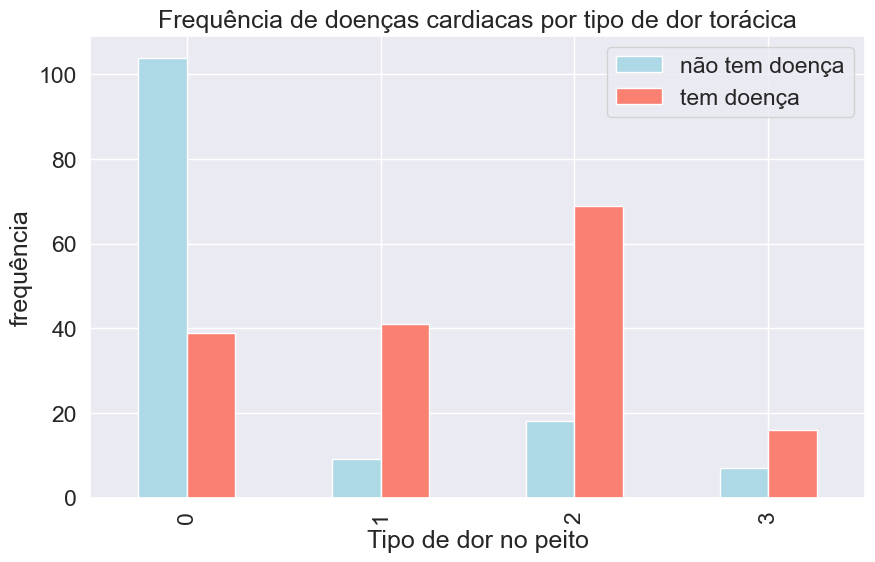

In [247]:
pd.crosstab(df["cp"], df["target"]).plot(kind="bar", figsize=(10,6), color = ["lightblue", "salmon"])

plt.title("Frequência de doenças cardiacas por tipo de dor torácica")
plt.xlabel("Tipo de dor no peito")
plt.ylabel("frequência")
plt.legend(["não tem doença","tem doença"])

<Axes: >

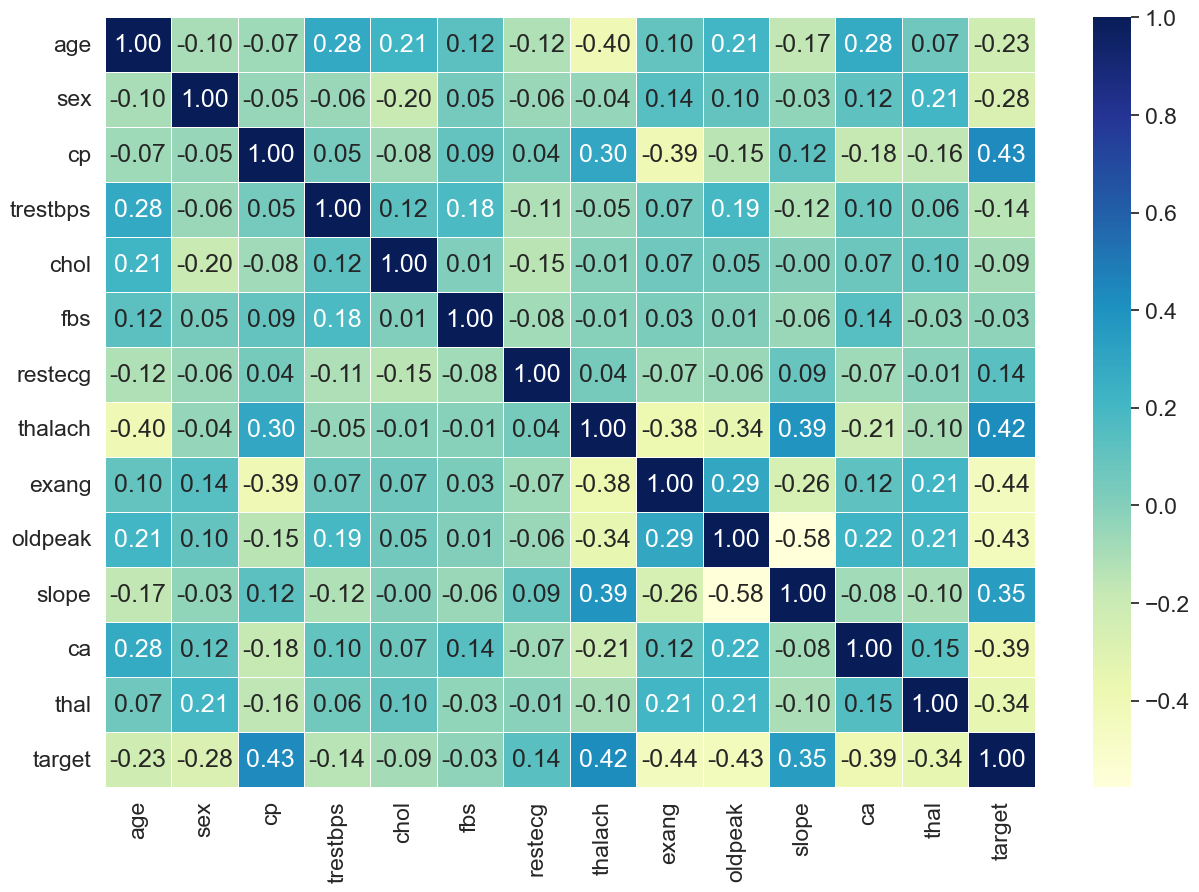

In [248]:
corr_matrix = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot = True, linewidths = 0.5, fmt = ".2f", cmap = "YlGnBu")

Text(0, 0.5, 'idade')

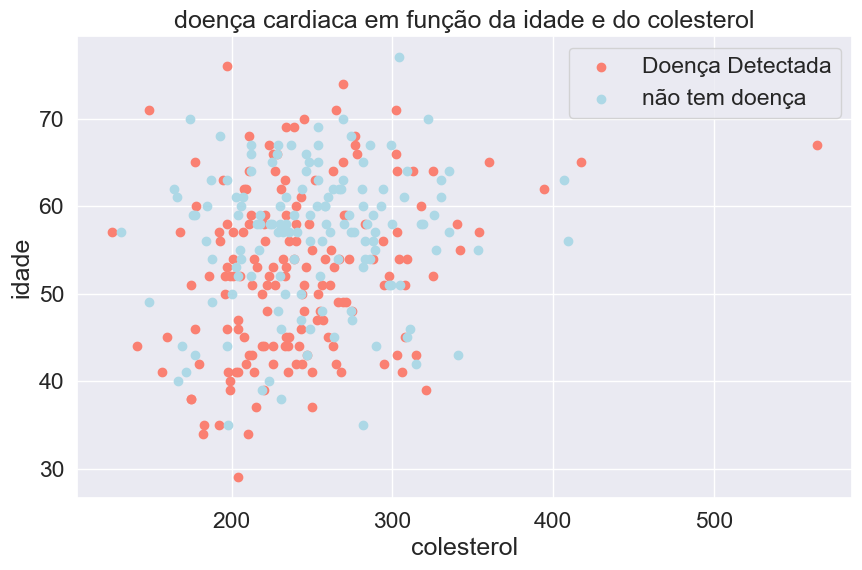

In [249]:
plt.figure(figsize=(10,6))

#valores positivos
plt.scatter(df["chol"][df["target"] == 1], df["age"][df["target"]==1], c="salmon")

#valores negativos
plt.scatter(df["chol"][df["target"] == 0], df["age"][df["target"] == 0], c="lightblue")

plt.title("doença cardiaca em função da idade e do colesterol")
plt.xlabel("colesterol")
plt.legend(["Doença Detectada", "não tem doença"])
plt.ylabel("idade")

#Modelagem dos dados

In [250]:
X = df.drop("target", axis = 1)
y = df["target"]

In [251]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [252]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

Treino e Teste

In [253]:
from sklearn.model_selection import train_test_split

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [255]:
len(X_train), len(y_train)

(242, 242)

In [256]:
len(X_test), len(y_test)

(61, 61)

In [257]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [258]:
models = {"KNN" : KNeighborsClassifier(), "Logistic Regression" : LogisticRegression(), "Random Forest" : RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    model_scores = {}

    for name, model in models.items():
        model.fit(X_train, y_train)

        model_scores[name] = model.score(X_test, y_test)

    return model_scores

In [259]:
fit_and_score(models=models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

C:\Users\CarneDePombo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.639344262295082,
 'Logistic Regression': 0.8360655737704918,
 'Random Forest': 0.8360655737704918}

Ajuste de hiperparametros e validação cruzada

In [260]:
train_scores = []
test_scores = []

neighbors = range(1, 21)

knn=KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    knn.fit(X_train, y_train)

    train_scores.append(knn.score(X_train, y_train))

    test_scores.append(knn.score(X_test, y_test))

In [261]:
train_scores

[1.0,
 0.8099173553719008,
 0.768595041322314,
 0.768595041322314,
 0.7479338842975206,
 0.743801652892562,
 0.743801652892562,
 0.71900826446281,
 0.6983471074380165,
 0.7066115702479339,
 0.6942148760330579,
 0.6942148760330579,
 0.6900826446280992,
 0.7066115702479339,
 0.6983471074380165,
 0.6900826446280992,
 0.6818181818181818,
 0.6735537190082644,
 0.6818181818181818,
 0.6859504132231405]

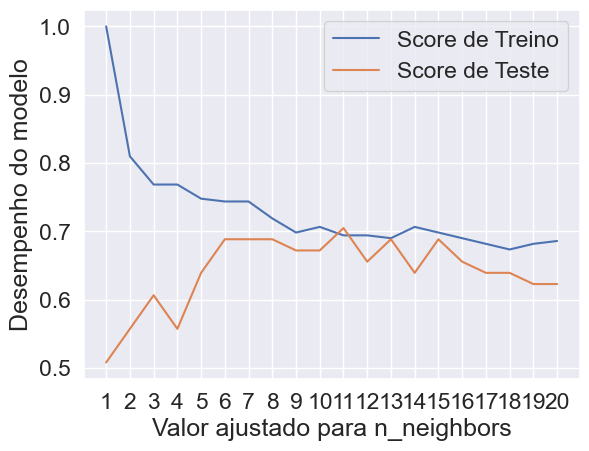

In [262]:
plt.plot(neighbors, train_scores, label="Score de Treino")
plt.plot(neighbors, test_scores, label="Score de Teste")
plt.xticks(np.arange(1, 21))
plt.xlabel("Valor ajustado para n_neighbors")
plt.ylabel("Desempenho do modelo")
plt.legend()

In [263]:
print(f"Desempenho máximo de KNN nos dados de teste: {max(test_scores)*100:.2f}%")

Desempenho máximo de KNN nos dados de teste: 70.49%


RandomizedSearchCV

In [264]:
logreg_grid = {"C": np.logspace(-4,4,20), "solver" : ["liblinear"]}

rf_grid = {"n_estimators" : np.arange(10,1000,50), "max_depth" : [None, 3, 5, 10], "min_samples_split":np.arange(2, 20, 2), "min_samples_leaf":np.arange(1, 20, 2)}

In [265]:
from sklearn.model_selection import RandomizedSearchCV

In [266]:
rscv_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions=logreg_grid, cv=5, n_iter=20, verbose=True)

rscv_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [267]:
rscv_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [268]:
rscv_log_reg.score(X_test, y_test)

0.8524590163934426

In [269]:
rscv_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid, cv=5, n_iter=20, verbose=True)

rscv_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [270]:
rscv_rf.best_params_

{'n_estimators': np.int64(360),
 'min_samples_split': np.int64(12),
 'min_samples_leaf': np.int64(5),
 'max_depth': 10}

In [271]:
rscv_rf.score(X_test, y_test)

0.819672131147541

In [272]:
from sklearn.model_selection import GridSearchCV

In [273]:
gs_lod_reg = GridSearchCV(LogisticRegression(), param_grid=logreg_grid, cv=5, verbose=True)

gs_lod_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [274]:
gs_lod_reg.best_params_

{'C': np.float64(0.23357214690901212), 'solver': 'liblinear'}

In [275]:
gs_lod_reg.score(X_test, y_test)

0.8524590163934426

avaliar o modelo

In [276]:
from sklearn.metrics import RocCurveDisplay
from sklearn.svm import SVC

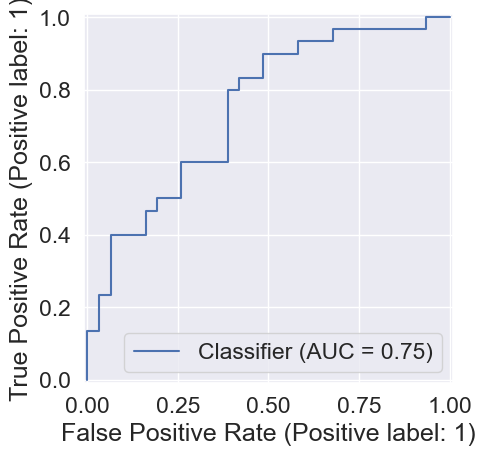

In [277]:
clf = SVC(random_state=0).fit(X_train, y_train)
y_pred = clf.decision_function(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred)

In [278]:
y_preds = rscv_rf.predict(X_test)

In [279]:
y_preds

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1])

In [280]:
np.array(y_test)

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1])

In [281]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_preds))

[[23  8]
 [ 3 27]]


Text(-1.2499999999999982, 0.5, 'Rótulos previstos')

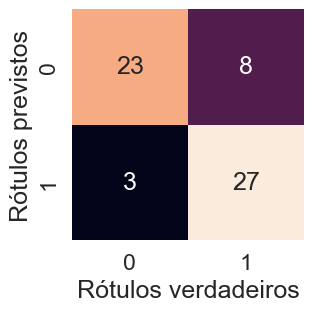

In [282]:
sns.set(font_scale=1.5)

fig, ax = plt.subplots(figsize=(3,3))
ax=sns.heatmap(confusion_matrix(y_test, y_preds),
               annot=True,
               cbar=False)

plt.xlabel("Rótulos verdadeiros")
plt.ylabel("Rótulos previstos")

In [283]:
from sklearn.metrics import classification_report

In [284]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.88      0.74      0.81        31
           1       0.77      0.90      0.83        30

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61

